### Refer [this](https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/) article for more information and explanation

###### Importing libraries

In [1]:
import pandas as pd
import numpy as np

###### Reading data using read_csv() function

In [2]:
df=pd.read_csv('iris.csv')

###### Displaying the DataFrame

In [3]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


###### Finding the data types of variables in the DataFrame

In [4]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

###### Importing libraries essential for data visualization

In [5]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
import seaborn as sns

## Plots for continuous variables' analysis

### ENUMERATIVE PLOTS

###### UNIVARIATE SCATTER PLOT

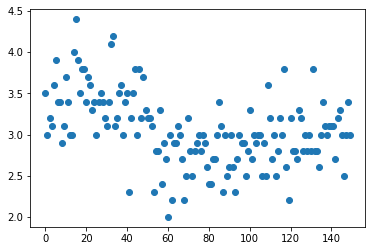

In [6]:
plt.scatter(df.index,df['sepal.width'])
plt.show()

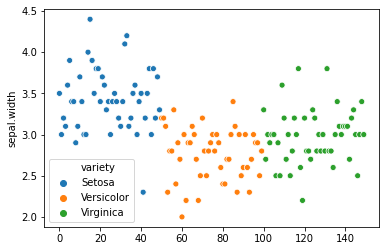

In [7]:
sns.scatterplot(x=df.index,y=df['sepal.width'],hue=df['variety'])

###### LINE PLOT WITH MARKERS

###### Setting title, figure size, labels and font size in matplotlib

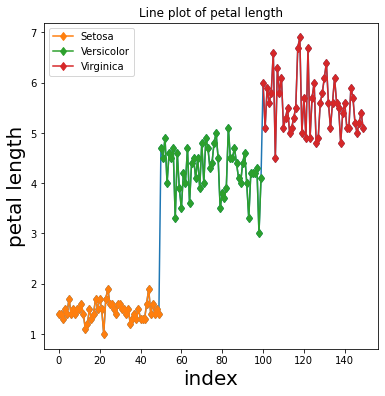

In [8]:
plt.figure(figsize=(6,6))
plt.title('Line plot of petal length')
plt.xlabel('index',fontsize=20)
plt.ylabel('petal length',fontsize=20)
plt.plot(df.index,df['petal.length'],markevery=1,marker='d')
for name, group in df.groupby('variety'):
    plt.plot(group.index, group['petal.length'], label=name,markevery=1,marker='d')
plt.legend()
plt.show()

###### Setting title, figure size,labels and font size in seaborn

In [9]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

[Text(0.5, 0, 'index')]

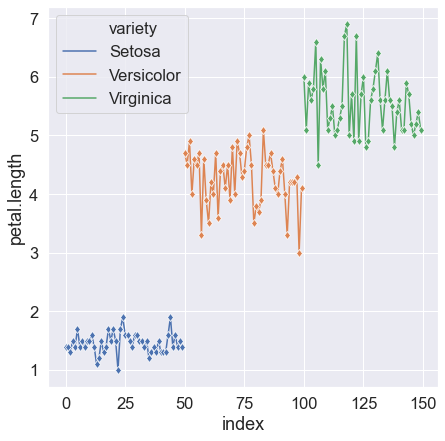

In [10]:
fig=sns.lineplot(x=df.index,y=df['petal.length'],markevery=1,marker='d',data=df,hue=df['variety'])
fig.set(xlabel='index')

###### STRIP PLOT

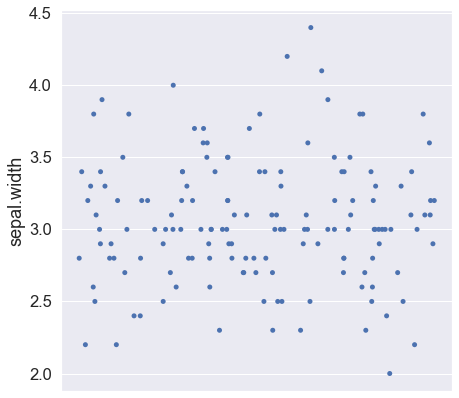

In [11]:
sns.stripplot(y=df['sepal.width'])

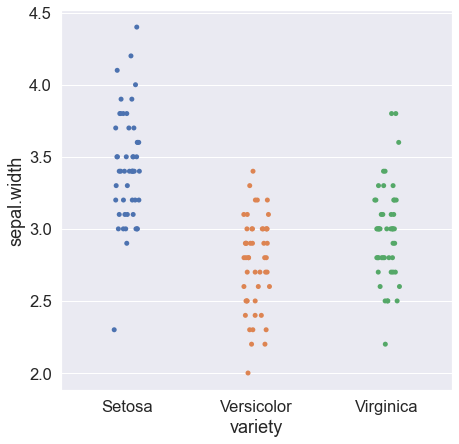

In [12]:
# Strip-plot(category wise)
sns.stripplot(x=df['variety'],y=df['sepal.width'])

###### SWARM PLOT

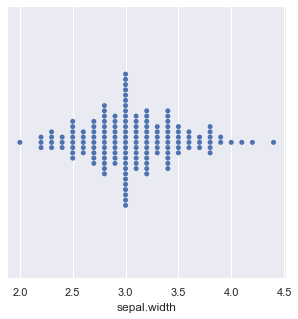

In [13]:
#Setting figure size
sns.set(rc={'figure.figsize':(5,5)})
#Swarm-plot
sns.swarmplot(x=df['sepal.width'])

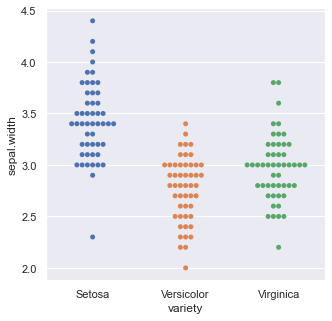

In [14]:
#Swarm-plot category wise
sns.swarmplot(x=df['variety'],y=df['sepal.width'])

### SUMMARY PLOTS

###### HISTOGRAM

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

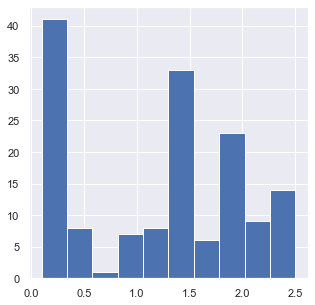

In [15]:
plt.hist(df['petal.width'])

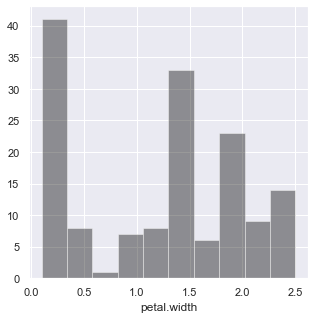

In [16]:
sns.distplot(df['petal.width'],kde=False,color='black',bins=10)

###### DENSITY PLOT

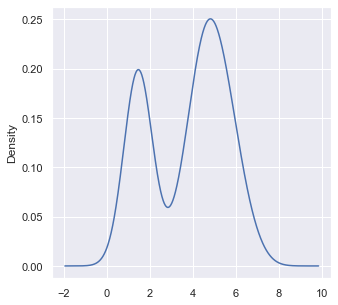

In [17]:
plt.figure(figsize=(5,5))
df['petal.length'].plot(kind='density')

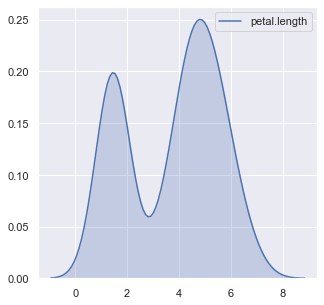

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['petal.length'],shade=True)

###### RUG PLOT

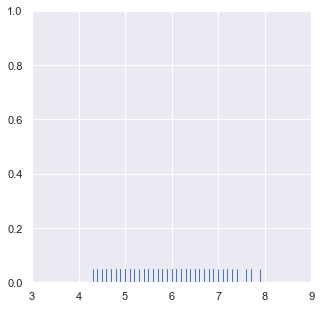

In [19]:
fig, ax = plt.subplots()
sns.rugplot(df['sepal.length'])
ax.set_xlim(3,9)
plt.show()

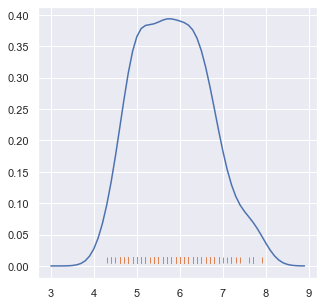

In [20]:
from scipy import stats
import numpy as np
kdf=df['sepal.length'].to_numpy()
rdf=np.hstack(kdf)
density = stats.kde.gaussian_kde(rdf)
x = np.arange(3,9,0.1)
plt.plot(x, density(x))
plt.plot(rdf,[0.01]*len(rdf), '|')

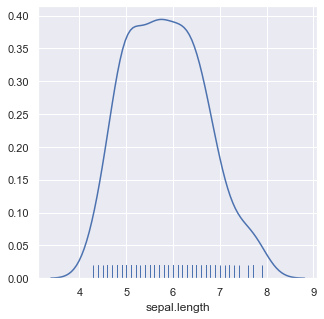

In [21]:
sns.distplot(df['sepal.length'],rug=True,hist=False)

###### BOX PLOT

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae3c3ce760>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae3c3ced60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae3c3ce400>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae3c4425b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae3c4428b0>],
 'means': []}

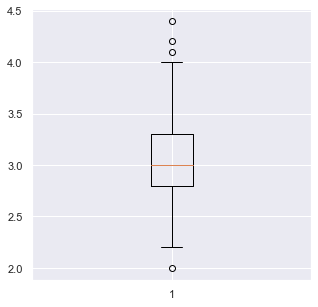

In [22]:
plt.boxplot(df['sepal.width'])

###### Removing the column with categorical variables

In [23]:
dfM=df.drop('variety',axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae3c499100>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae3c499670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae3c488d60>,
 'medians': [<matplotlib.lines.Line2D at 0x2ae3c499d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ae3c4a4070>,
 'means': []}

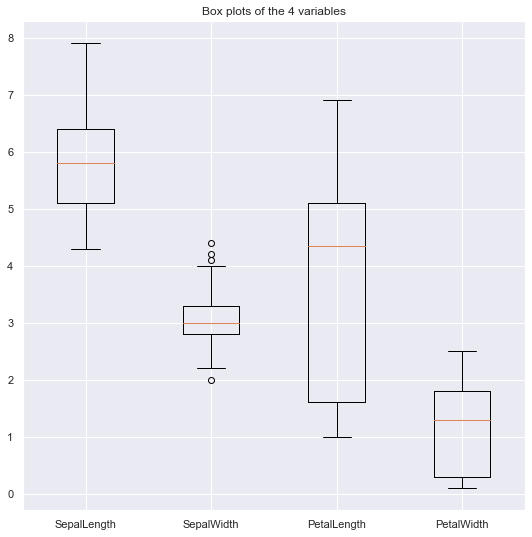

In [24]:
plt.figure(figsize=(9,9))
#Set Title
plt.title('Box plots of the 4 variables')
plt.boxplot(dfM.values,labels=['SepalLength','SepalWidth','PetalLength','PetalWidth'])

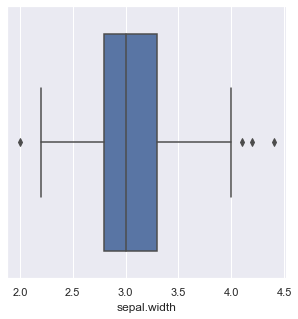

In [25]:
sns.boxplot(df['sepal.width'])

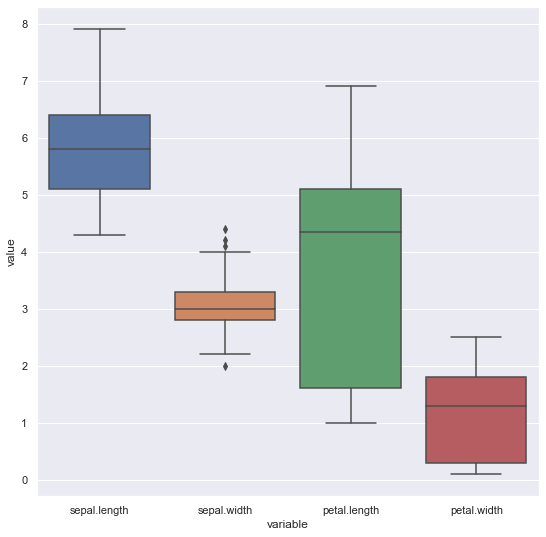

In [26]:
sns.set(rc={'figure.figsize':(9,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(dfM))

###### distplot()

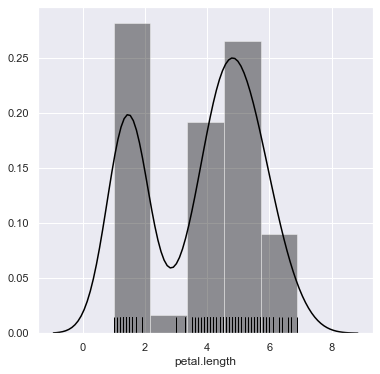

In [27]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['petal.length'],color='black',rug=True)

###### VIOLIN PLOT

{'bodies': [<matplotlib.collections.PolyCollection at 0x2ae3c63fe20>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2ae3c63fc70>,
 'cmins': <matplotlib.collections.LineCollection at 0x2ae3c64fbb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2ae3c64ff40>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2ae3c65d2e0>}

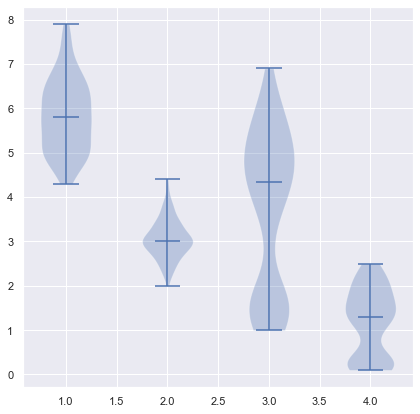

In [28]:
plt.figure(figsize=(7,7))
plt.violinplot(dfM.values,showmedians=True)

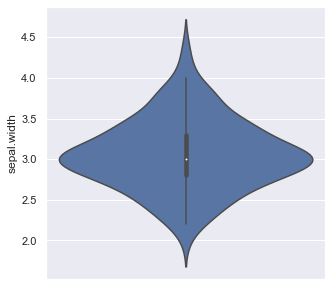

In [29]:
sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(df['sepal.width'],orient='vertical')

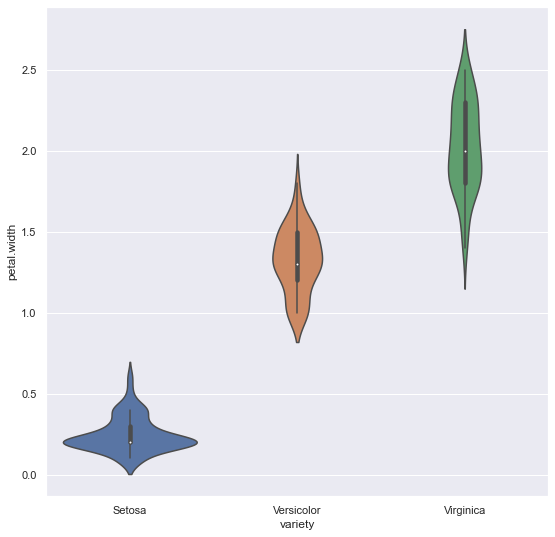

In [30]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df['variety'], y=df['petal.width'],data=df)

## Plots for categorical variables' analysis

###### BAR PLOT

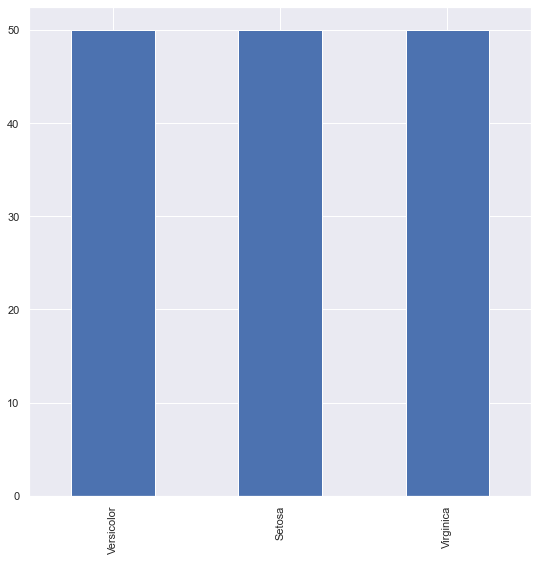

In [31]:
df['variety'].value_counts().plot.bar()

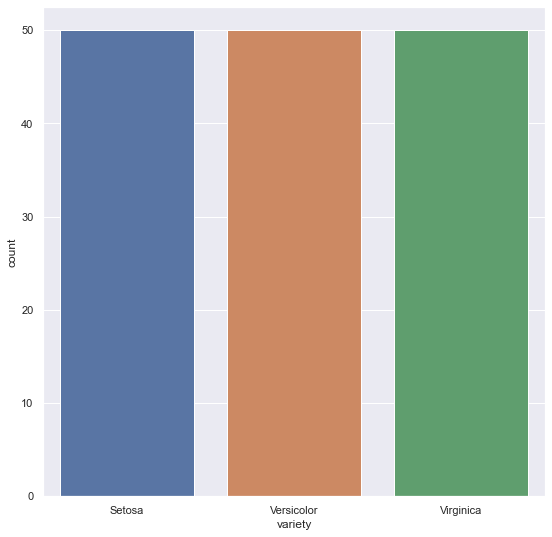

In [32]:
sns.countplot(df['variety'])

###### PIE CHART

([<matplotlib.patches.Wedge at 0x2ae3bff6070>,
 [Text(0.5499999702695115, 0.9526279613277875, 'SETOSA'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'VERSICOLOR'),
  Text(0.5500001486524352, -0.9526278583383436, 'VIRGINICA')])

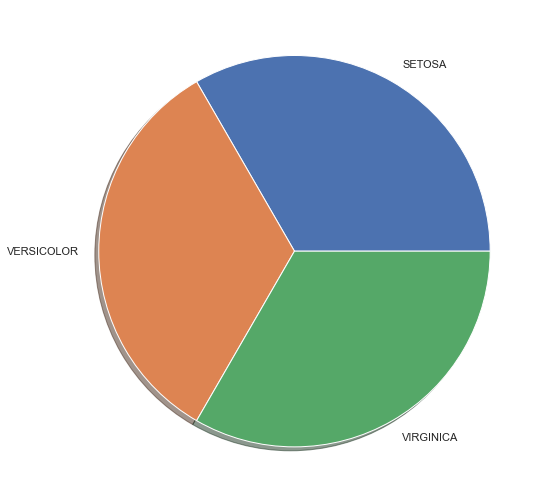

In [33]:
plt.pie(df['variety'].value_counts(),labels=['SETOSA','VERSICOLOR','VIRGINICA'],shadow=True)

In [35]:
df1=df.sample(frac=0.35)

([<matplotlib.patches.Wedge at 0x2ae3c8d2160>,
 [Text(-1.0819818905017171, 0.1982805805577796, 'SETOSA'),
  Text(0.7294348884854756, -0.8233618545088072, 'VERSICOLOR'),
  Text(0.678390766127673, 0.8659018237841454, 'VIRGINICA')],
 [Text(-0.5901719402736638, 0.10815304394060705, '44.231'),
  Text(0.39787357553753205, -0.449106466095713, '34.615'),
  Text(0.3700313269787307, 0.47231008570044286, '21.154')])

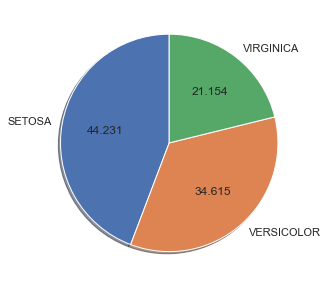

In [36]:
plt.figure(figsize=(5,5))
plt.pie(df1['variety'].value_counts(),startangle=90,autopct='%.3f',labels=['SETOSA','VERSICOLOR','VIRGINICA'],shadow=True)